Q1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
# 1. Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import re

In [ ]:
df=pd.read_csv('/content/instagram_reach.csv')

In [ ]:
df.head(5)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [ ]:
#Dropping unwanted columns
df.drop(['Unnamed: 0','S.No','USERNAME'],axis=1,inplace=True)

In [ ]:
df.shape

(100, 5)

In [ ]:
#2. Cleaning the data
df['Time since posted']=df['Time since posted'].map(lambda a: int(re.sub('hours','',a)))

In [ ]:
df

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...
95,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


In [ ]:
#3. Modelling
#Preparing X and y features

In [ ]:
X=df.drop(['Caption','Hashtags','Likes'],axis=1)

In [ ]:
X

,Followers,Time since posted
0,1600,11
1,880,2
2,255,2
3,340,3
4,304,3
...,...,...
95,614,3
96,450,3
97,182,3
98,2039,3


In [ ]:
y=df['Likes']

In [ ]:
y

0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 100, dtype: int64

In [ ]:
#Model Building
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

stdSc = StandardScaler()
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.transform(X_test)

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor":BaggingRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 46.6778
- Mean Absolute Error: 27.7194
- R2 Score: 0.3583
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.2597
- Mean Absolute Error: 18.4979
- R2 Score: 0.6184


Lasso
Model performance for Training set
- Root Mean Squared Error: 46.6949
- Mean Absolute Error: 27.7647
- R2 Score: 0.3579
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.2216
- Mean Absolute Error: 18.6536
- R2 Score: 0.6196


Ridge
Model performance for Training set
- Root Mean Squared Error: 46.6796
- Mean Absolute Error: 27.7284
- R2 Score: 0.3583
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 23.1547
- Mean Absolute Error: 18.4592
- R2 Score: 0.6218


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 46.2823
- Mean Absolute Error: 25.6750
- R2 Score: 0.3692
---------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,Bagging Regressor,0.862176
9,Gradient Boosting Regressor,0.846428
4,Decision Tree,0.773354
6,XGBRegressor,0.746840
5,Random Forest Regressor,0.706426
2,Ridge,0.621805
1,Lasso,0.619617
0,Linear Regression,0.618368
7,AdaBoost Regressor,0.449981
3,K-Neighbors Regressor,0.432669


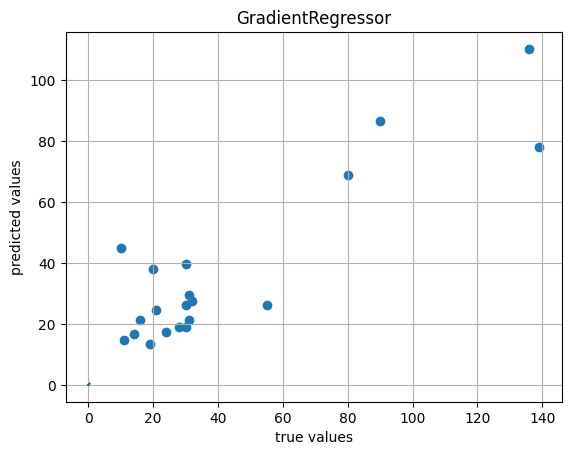

In [ ]:
#Predictions
# doing Some Benchmarks
br=BaggingRegressor()
br.fit(X_train, y_train)
predictions = br.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)


Model is not perfectly fitting but can be still workable. Hyperparameter tuning may be done for improving the accuracy of the model.

#Q-2. Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
#any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.
#https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels 

In [ ]:
#1. Import libraries

In [ ]:
# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
df=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:

df.rename(columns = {'NObeyesdad':'Weight_Category'}, inplace = True)

In [ ]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Weight_Category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [ ]:
df.shape

(2111, 17)

In [ ]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Weight_Category                   0
dtype: int64

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


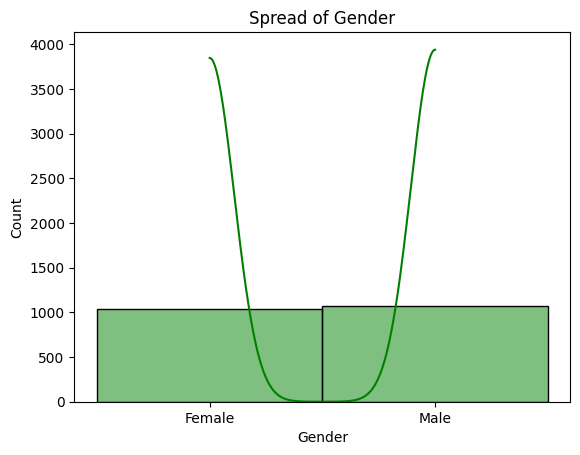

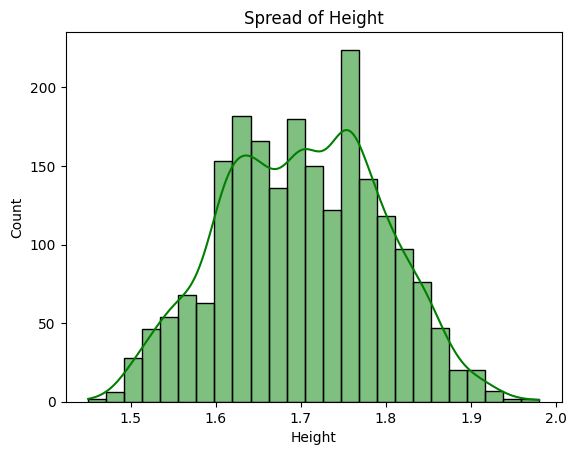

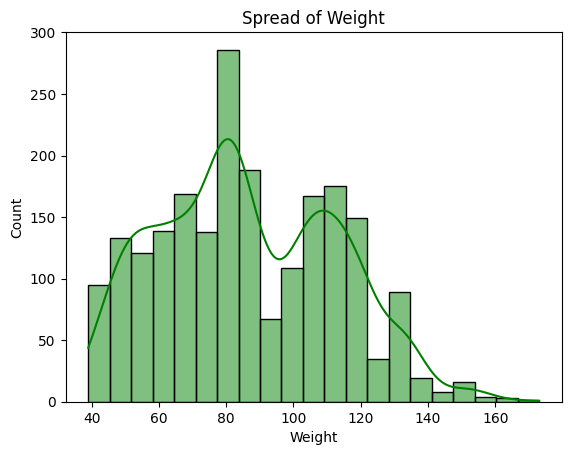

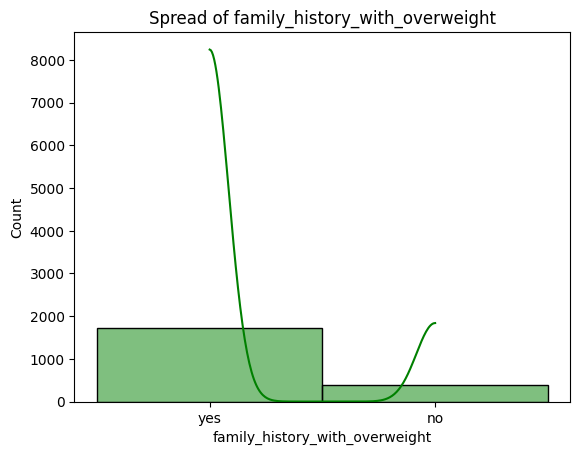

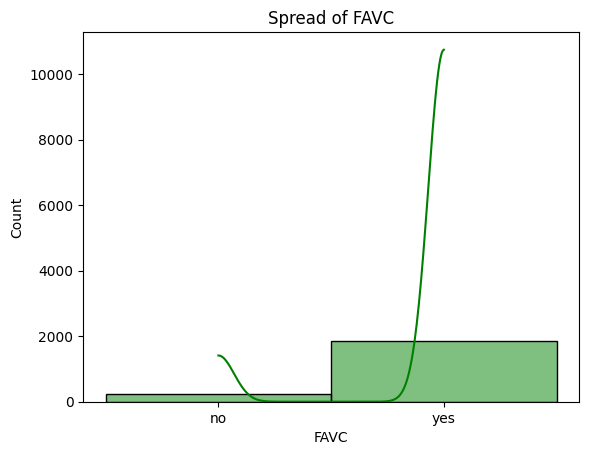

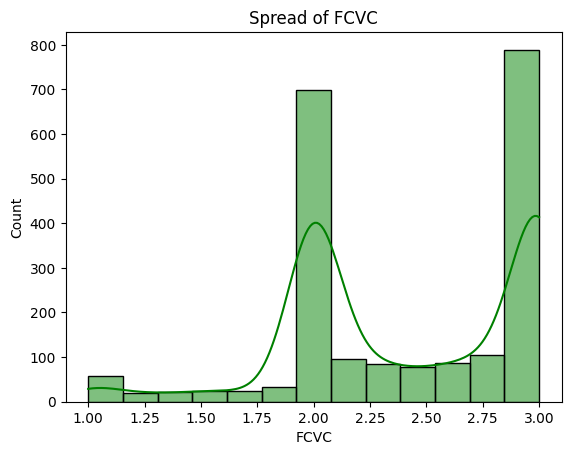

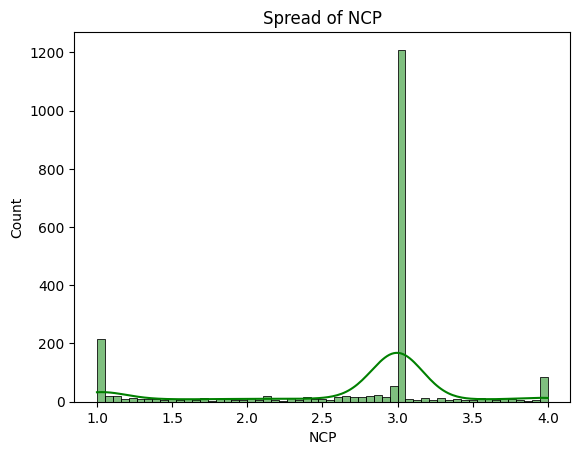

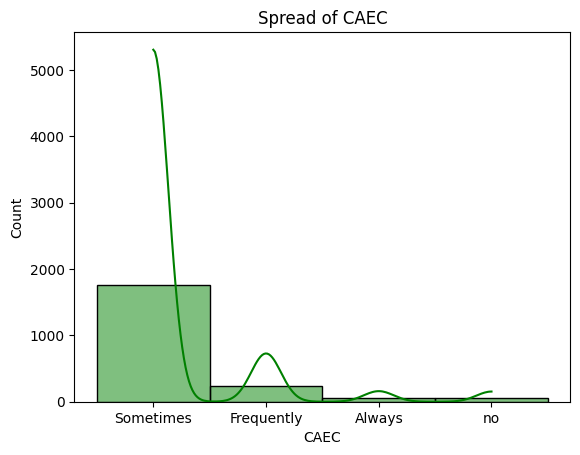

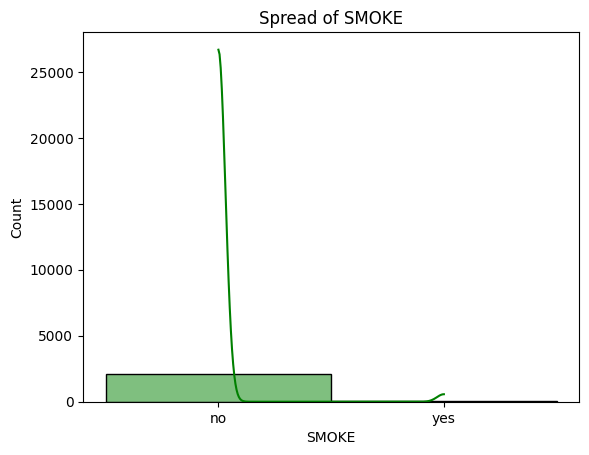

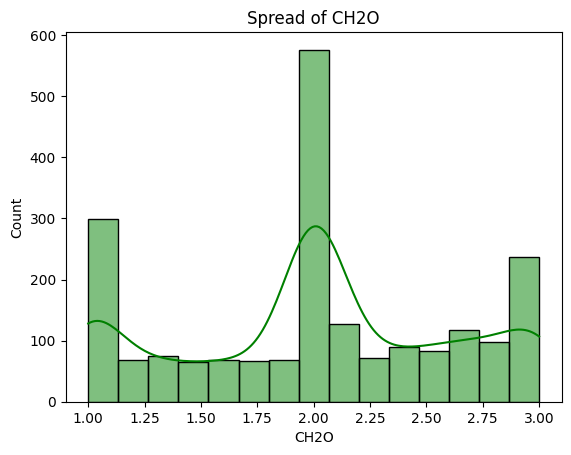

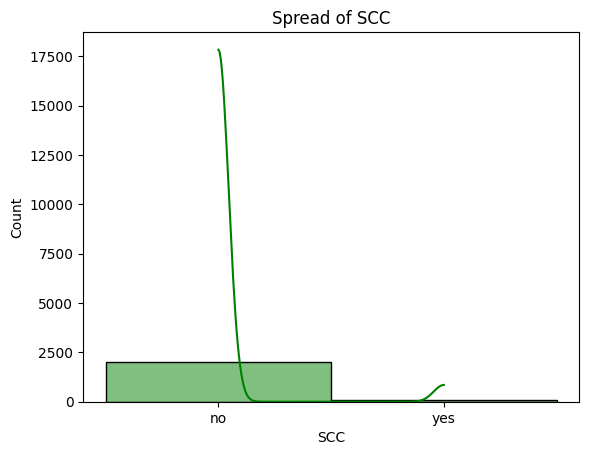

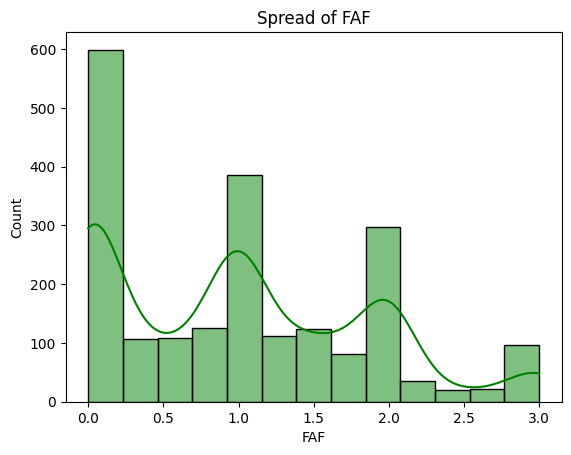

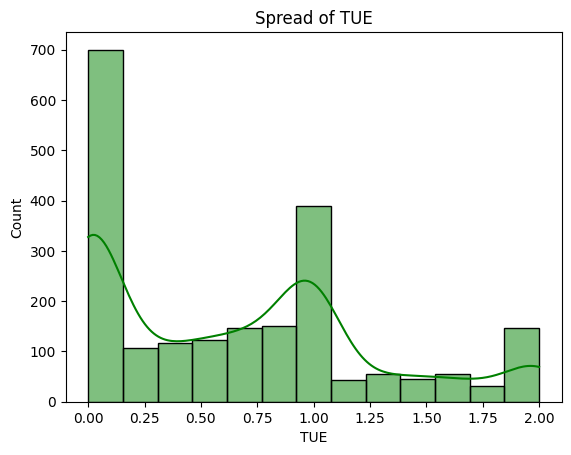

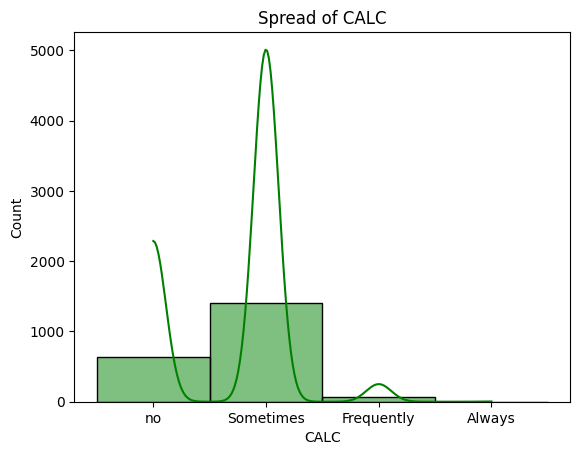

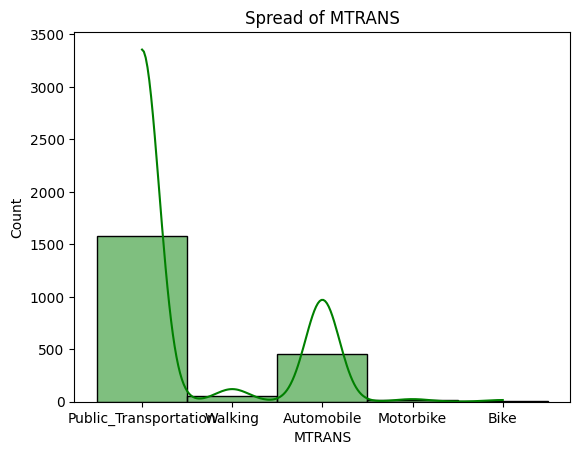

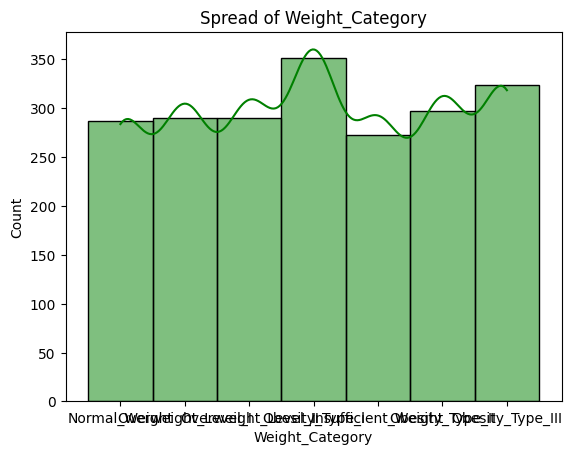

In [ ]:
#Check the spread of the data
for i in df.columns:
  if i not in ['Age','CH20']:
    sns.histplot(df[i],kde=True,color="g")
    plt.title("Spread of "+str(i))
    plt.show()

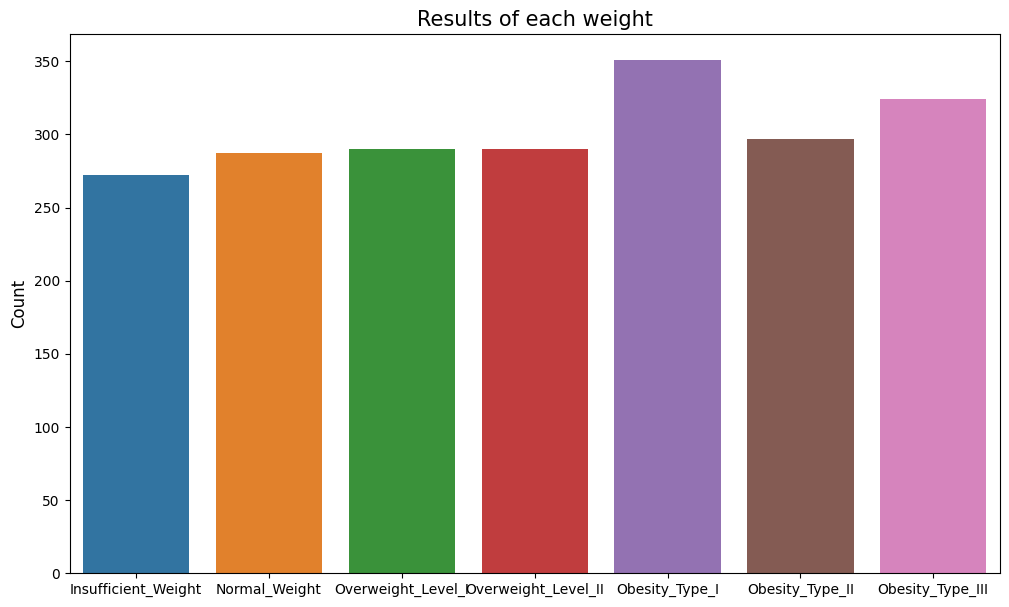

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='Weight_Category',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Results of each weight',fontsize=15)
plt.show()

<ipython-input-21-3bd7e59bf0b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,


<Axes: >

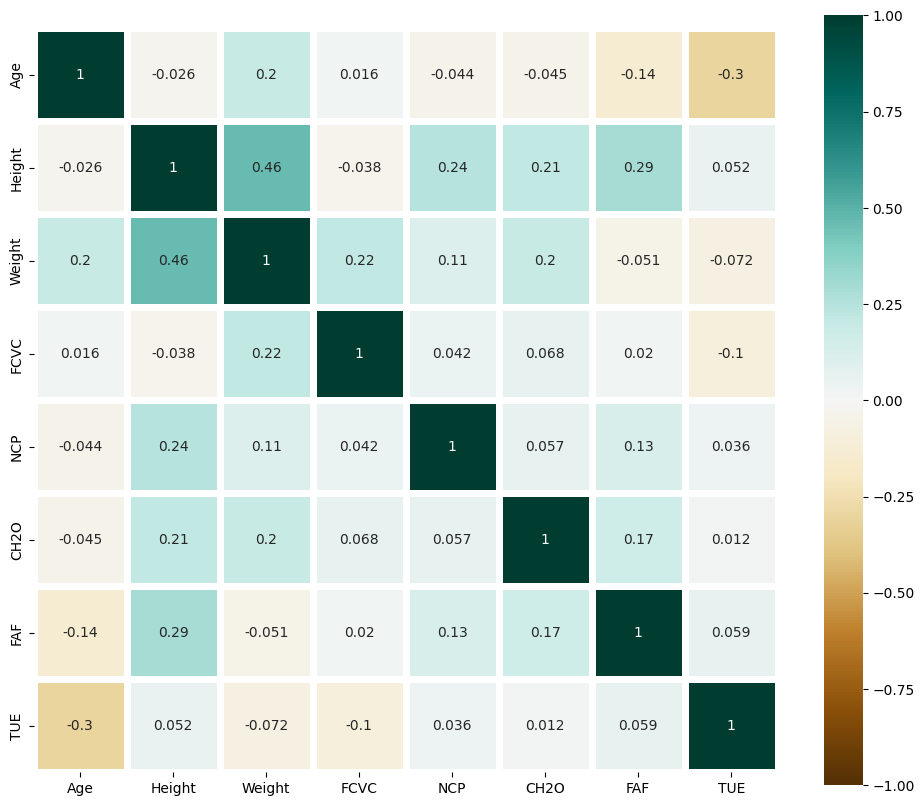

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)


In [ ]:
#Preparing X and y
X=df.drop(columns = ['Weight_Category'],axis=1)
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [ ]:
y=df['Weight_Category']

In [ ]:
#Data Processing
# Create Column Transformer with 3 types of transformers

le = LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

y = le.fit_transform(y)

In [ ]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [ ]:
y

array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((1688, 16), (423, 16))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score
models=[DecisionTreeClassifier,SVC,RandomForestClassifier]
d={}
for i in models:
  model=i()
  model.fit(X_train,y_train)
  y_preds=model.predict(X_test)
  acc=accuracy_score(y_test,y_preds)
  i=str(i).split(".")[-1]
  i=i[:-2]
  d[i]=round(acc,2)

In [ ]:
d

{'DecisionTreeClassifier': 0.94, 'SVC': 0.57, 'RandomForestClassifier': 0.95}

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Decision tree classifier seems fitting well with dataset.

In [ ]:
##Classsifcation report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.89      0.87      0.88        62
           2       0.95      0.94      0.94        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.91      0.91      0.91        56
           6       0.94      0.94      0.94        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

[[54  2  0  0  0  0  0]
 [ 5 54  0  0  0  3  0]
 [ 0  1 73  2  0  0  2]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 51  1]
 [ 0  0  1  0  0  2 47]]


Q-3. Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.
Dataset This is the Dataset You can use this dataset for this question.
Q-

Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
df=pd.read_csv('/content/online_shoppers_intention.csv')

In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# Cleaning the missing data
empty_columns=df.isnull().sum()
empty_columns=empty_columns[empty_columns.values>(0.3*len(empty_columns))]
# listing the null values columns having more than 30%
print(empty_columns)

Series([], dtype: int64)


In [ ]:
##Imputing the missing values with mean of the population
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
#Impute the null values with median and mean
#Month
median_value=df['Month'].median()
#df['Month'].fillna(median_value,inplace=True,)
#mean
mean_value=df['VisitorType'].mean()
df['VisitorType'].fillna(mean_value,inplace=True)
df['VisitorType']

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12325   NaN
12326   NaN
12327   NaN
12328   NaN
12329   NaN
Name: VisitorType, Length: 12330, dtype: float64

<Axes: xlabel='Month'>

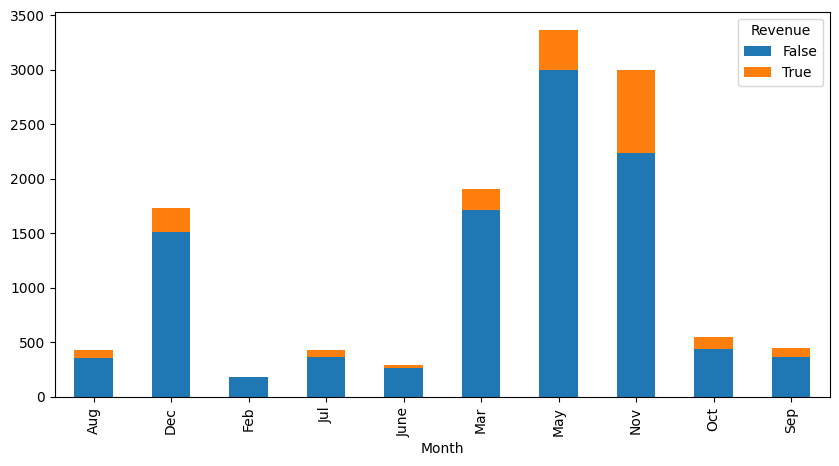

In [ ]:
#To determine the varaiation of revenue over a month
df.groupby('Revenue')['Month'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5))

Higher revenue in the month of Nov.Least in the month of Feb.

<Axes: ylabel='VisitorType'>

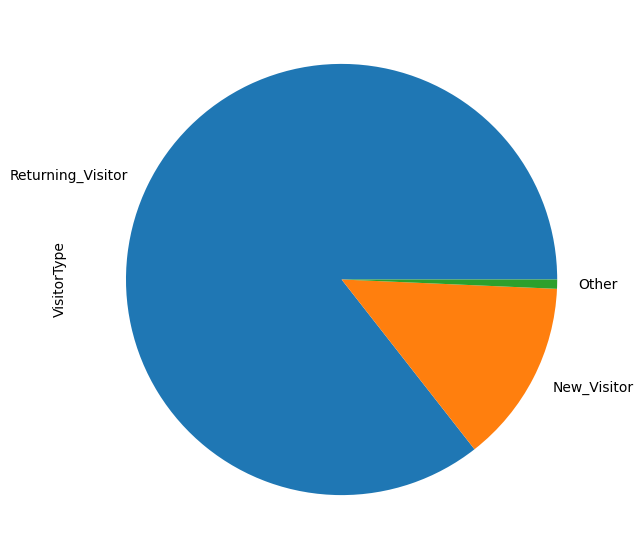

In [ ]:
#To determine the categorical distribution of Visitor Types
df['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))


More number of returning visitors.

In [ ]:
#Feature scaling and standardization

In [ ]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)
VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:0,False:1}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

In [ ]:
#Preparing X and Y variable

In [ ]:
X=df.drop(['Revenue'],axis=1)


In [ ]:
y=df['Revenue']

In [ ]:
#Data Processing
# Create Column Transformer with 3 types of transformers

le = LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

y = le.fit_transform(y)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((9864, 17), (2466, 17))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
models=[DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier]
d={}
for i in models:
  model=i()
  model.fit(X_train,y_train)
  y_preds=model.predict(X_test)
  acc=accuracy_score(y_test,y_preds)
  i=str(i).split(".")[-1]
  i=i[:-2]
  d[i]=round(acc,2)

In [ ]:
d

{'DecisionTreeClassifier': 0.85,
 'KNeighborsClassifier': 0.85,
 'RandomForestClassifier': 0.89}

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Decision Tree classifier seems to be fitting with dataset. We can improve the accuracy further by hyperparameter tuning.

Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
#Reading the file
df=pd.read_csv('/content/rideshare_kaggle.csv')

In [ ]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1.543392e+09,35.75,1.543421e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81071,7f93f203-527d-4aad-bdf1-74c88c7e5582,1.543402e+09,10,28,11,2018-11-28 10:41:23,America/New_York,Theatre District,South Station,Lyft,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1.543399e+09,36.58,1.543439e+09
81072,a53381db-329a-4eba-a41b-61e3559edc44,1.543562e+09,7,30,11,2018-11-30 07:13:00,America/New_York,Theatre District,South Station,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1.543576e+09,40.61,1.543612e+09
81073,b51615fe-d56b-4feb-92a5-13181f5d0f00,1.544679e+09,5,13,12,2018-12-13 05:30:14,America/New_York,Theatre District,South Station,Lyft,...,0.0001,1544716800,17.98,1544688000,33.82,1544731200,13.52,1.544688e+09,32.84,1.544735e+09
81074,4e18646d-48d5-49b6-b4c9-cf5086211d88,1.544989e+09,19,16,12,2018-12-16 19:40:12,America/New_York,Financial District,Boston University,Uber,...,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1.545019e+09,38.36,1.544987e+09


In [ ]:
df.shape

(81076, 57)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81076 entries, 0 to 81075
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           81076 non-null  object 
 1   timestamp                    81076 non-null  float64
 2   hour                         81076 non-null  int64  
 3   day                          81076 non-null  int64  
 4   month                        81076 non-null  int64  
 5   datetime                     81076 non-null  object 
 6   timezone                     81076 non-null  object 
 7   source                       81076 non-null  object 
 8   destination                  81076 non-null  object 
 9   cab_type                     81076 non-null  object 
 10  product_id                   81076 non-null  object 
 11  name                         81076 non-null  object 
 12  price                        74700 non-null  float64
 13  distance        

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,8.107600e+04,81076.000000,81076.000000,81076.000000,74700.000000,81076.000000,81076.000000,81076.000000,81076.000000,81076.000000,...,81076.000000,8.107600e+04,81076.000000,8.107600e+04,81076.000000,8.107600e+04,81076.000000,8.107500e+04,81075.000000,8.107500e+04
mean,1.544032e+09,11.566937,18.006525,11.574350,16.576747,2.192221,1.015337,42.338370,-71.066158,39.551079,...,0.037218,1.544030e+09,33.466297,1.544027e+09,45.205160,1.544033e+09,29.747172,1.544034e+09,41.893714,1.544034e+09
std,6.876397e+05,6.986291,9.980454,0.494444,9.365340,1.138841,0.096336,0.047628,0.020228,6.685528,...,0.055219,6.897578e+05,6.453114,6.889409e+05,5.597371,6.886263e+05,7.067604,6.859238e+05,6.896205,6.895971e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543441e+09,5.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.500000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543723e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543684e+09,34.220000,1.543666e+09,44.660000,1.543691e+09,30.130000,1.543662e+09,40.690000,1.543691e+09
75%,1.544818e+09,18.000000,28.000000,12.000000,22.500000,2.940000,1.000000,42.364700,-71.054200,43.570000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.330000,1.544789e+09,44.060000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,92.000000,7.500000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [ ]:
#To find the null values
df.isnull().sum()

id                                0
timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          6376
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                  

In [ ]:
mean_value=df['price'].mean()
df['price'].fillna(mean_value,inplace=True)
df.rename(columns = {'visibility.1':'visibility'}, inplace = True)
df.dropna()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1.543392e+09,35.75,1.543421e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81070,6cf113a2-e525-43fc-bcfd-98d75b449c48,1.544817e+09,19,14,12,2018-12-14 19:55:10,America/New_York,Theatre District,South Station,Lyft,...,0.0000,1544806800,27.11,1544781600,46.61,1544814000,27.76,1.544782e+09,43.85,1.544818e+09
81071,7f93f203-527d-4aad-bdf1-74c88c7e5582,1.543402e+09,10,28,11,2018-11-28 10:41:23,America/New_York,Theatre District,South Station,Lyft,...,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1.543399e+09,36.58,1.543439e+09
81072,a53381db-329a-4eba-a41b-61e3559edc44,1.543562e+09,7,30,11,2018-11-30 07:13:00,America/New_York,Theatre District,South Station,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1.543576e+09,40.61,1.543612e+09
81073,b51615fe-d56b-4feb-92a5-13181f5d0f00,1.544679e+09,5,13,12,2018-12-13 05:30:14,America/New_York,Theatre District,South Station,Lyft,...,0.0001,1544716800,17.98,1544688000,33.82,1544731200,13.52,1.544688e+09,32.84,1.544735e+09


In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [ ]:
mean_value =df['apparentTemperatureMinTime'].mean()
df['apparentTemperatureMinTime'].fillna(mean_value,inplace=True)
df.dropna(axis=1, how='any')

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1.545012e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1.543291e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1.543378e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1.543550e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1.543392e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81071,7f93f203-527d-4aad-bdf1-74c88c7e5582,1.543402e+09,10,28,11,2018-11-28 10:41:23,America/New_York,Theatre District,South Station,Lyft,...,1543439718,0.72,0.0000,1543420800,33.75,1543399200,42.60,1543438800,29.97,1.543399e+09
81072,a53381db-329a-4eba-a41b-61e3559edc44,1.543562e+09,7,30,11,2018-11-30 07:13:00,America/New_York,Theatre District,South Station,Lyft,...,1543612472,0.79,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1.543576e+09
81073,b51615fe-d56b-4feb-92a5-13181f5d0f00,1.544679e+09,5,13,12,2018-12-13 05:30:14,America/New_York,Theatre District,South Station,Lyft,...,1544735601,0.21,0.0001,1544716800,17.98,1544688000,33.82,1544731200,13.52,1.544688e+09
81074,4e18646d-48d5-49b6-b4c9-cf5086211d88,1.544989e+09,19,16,12,2018-12-16 19:40:12,America/New_York,Financial District,Boston University,Uber,...,1544994842,0.30,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1.545019e+09


In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [ ]:
#Data Analysis

df.groupby(['cab_type','name'])['price'].sum()

cab_type  name        
Lyft      Lux             108474.500000
          Lux Black       140623.500000
          Lux Black XL    197839.500000
          Lyft             58639.000000
          Lyft XL          93367.000000
          Shared           36677.500000
Uber      Black           130334.500000
          Black SUV       192476.000000
          Taxi            105693.338795
          UberPool         56091.500000
          UberX            62146.000000
          UberXL           99705.000000
          WAV              61909.000000
Name: price, dtype: float64

In [ ]:
df.groupby(['cab_type','destination'])['price'].sum()

cab_type  destination            
Lyft      Back Bay                   49908.000000
          Beacon Hill                52028.000000
          Boston University          64415.000000
          Fenway                     61499.500000
          Financial District         56754.500000
          Haymarket Square           45836.500000
          North End                  48783.500000
          North Station              52659.500000
          Northeastern University    59375.500000
          South Station              43955.000000
          Theatre District           52702.000000
          West End                   47704.000000
Uber      Back Bay                   55402.603735
          Beacon Hill                58151.061928
          Boston University          68259.131807
          Fenway                     65323.173614
          Financial District         62725.175904
          Haymarket Square           53483.829398
          North End                  57658.092289
          North 

In [ ]:
mean_value1 =df['apparentTemperatureMax'].mean()
df['apparentTemperatureMax'].fillna(mean_value1,inplace=True)
mean_value =df['apparentTemperatureMaxTime'].mean()
df['apparentTemperatureMaxTime'].fillna(mean_value,inplace=True)

In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [ ]:
feature=['distance','surge_multiplier','name','cab_type']
X=df[feature]
y=df['source']


In [ ]:
#Labelling the datasets
le = LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

y = le.fit_transform(y)


<ipython-input-46-564b0a7746cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])
<ipython-input-46-564b0a7746cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])


In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((64860, 4), (16216, 4))

In [ ]:
# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
models=[DecisionTreeClassifier]
d={}
for i in models:
  model=i()
  model.fit(X_train,y_train)
  y_preds=model.predict(X_test)
  acc=accuracy_score(y_test,y_preds)
  i=str(i).split(".")[-1]
  i=i[:-2]
  d[i]=round(acc,2)

In [ ]:
d

{'DecisionTreeClassifier': 0.7}

In [ ]:
##___________Predict the price______________________

In [ ]:
feature=['distance','surge_multiplier','name','cab_type']
X=df[feature]
y=df['price']


In [ ]:
#Labelling the datasets
le = LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

y = le.fit_transform(y)


<ipython-input-70-744d4ca265db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])
<ipython-input-70-744d4ca265db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])


In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((64860, 4), (16216, 4))

In [ ]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 12.8482
- Mean Absolute Error: 10.1698
- R2 Score: 0.4997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.7731
- Mean Absolute Error: 10.0706
- R2 Score: 0.5098


Lasso
Model performance for Training set
- Root Mean Squared Error: 13.5958
- Mean Absolute Error: 10.7885
- R2 Score: 0.4398
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.5903
- Mean Absolute Error: 10.7251
- R2 Score: 0.4450


Ridge
Model performance for Training set
- Root Mean Squared Error: 12.8482
- Mean Absolute Error: 10.1699
- R2 Score: 0.4997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.7732
- Mean Absolute Error: 10.0708
- R2 Score: 0.5098


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.3423
- Mean Absolute Error: 2.1282
- R2 Score: 0.9661
-----------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.964812
4,Decision Tree,0.963792
3,K-Neighbors Regressor,0.961130
0,Linear Regression,0.509777
2,Ridge,0.509767
1,Lasso,0.445045


 #1. Decision tree classifier = 0.7 , This can be further improved through hyper parameter tuning for locating the booking area.
 #2. Random Forest Classifier suits better for predicting the price for a specific trip.

Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings



In [ ]:
#Reading the data
df=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Insight
From above description of numerical data, all means are very close to each other - between 5403.45 and 0.84;
All standard deviations are also close - between 6109.04 and 0.364;
While there is a minimum score 0 for coapplicant and credit history and max for applicant income.

In [ ]:
#To check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(" No of numerical features are: {}".format(len(numeric_features), numeric_features))
print('No of categorical features are: {}'.format(len(categorical_features), categorical_features))

 No of numerical features are: 5
No of categorical features are: 8


In [ ]:
df.duplicated().sum()

0

In [ ]:
for feature in numeric_features:
 median_value=df[feature].median()
 df[feature].fillna(median_value,inplace=True)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# filling with Unknown class
df_clean = df.fillna("Unknown")
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


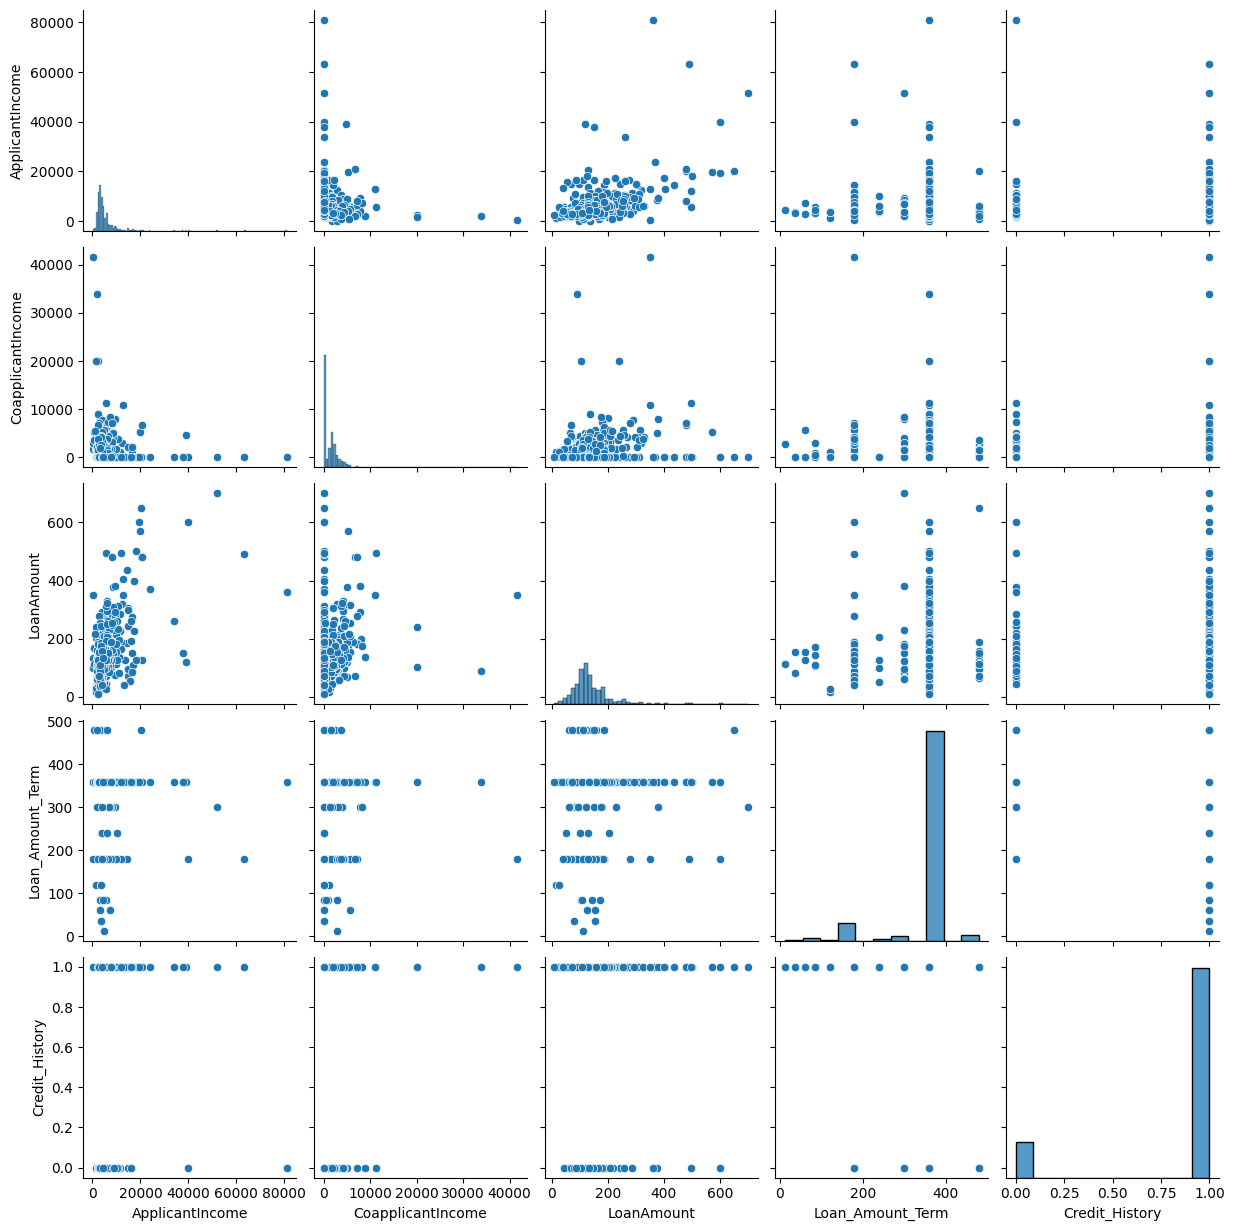

In [ ]:
#Plots
sns.pairplot(df_clean)

In [ ]:
##Preparing the data
feature=['distance','surge_multiplier','name','cab_type']
X=df_clean.drop(['Loan_Status'],axis=1)
y=df_clean['Loan_Status']

In [ ]:
#Labelling the datasets
le = LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass

y = le.fit_transform(y)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((491, 12), (123, 12))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score
models=[LogisticRegression,DecisionTreeClassifier,SVC,RandomForestClassifier]
d={}
for i in models:
  model=i()
  model.fit(X_train,y_train)
  y_preds=model.predict(X_test)
  acc=accuracy_score(y_test,y_preds)
  i=str(i).split(".")[-1]
  i=i[:-2]
  d[i]=round(acc,2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
d

{'LogisticRegression': 0.69,
 'DecisionTreeClassifier': 0.7,
 'SVC': 0.65,
 'RandomForestClassifier': 0.77}

Insights: This accuracy can be improved by hyper parameter tuning.

Q-7. Imagine you have a dataset where you need to predict the Genres of Music
using
an Unsupervised algorithm and you need to find the accuracy of the model, built-in
docker, and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Reading and merging datasets
df1=pd.read_csv("/content/data.csv")
df2=pd.read_csv("/content/data_2genre.csv")
df=pd.concat([df1,df2])


In [ ]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
1            100
2            100
Name: label, dtype: int64

In [ ]:
df.shape

(1200, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1200 non-null   object 
 1   tempo               1200 non-null   float64
 2   beats               1200 non-null   int64  
 3   chroma_stft         1200 non-null   float64
 4   rmse                1200 non-null   float64
 5   spectral_centroid   1200 non-null   float64
 6   spectral_bandwidth  1200 non-null   float64
 7   rolloff             1200 non-null   float64
 8   zero_crossing_rate  1200 non-null   float64
 9   mfcc1               1200 non-null   float64
 10  mfcc2               1200 non-null   float64
 11  mfcc3               1200 non-null   float64
 12  mfcc4               1200 non-null   float64
 13  mfcc5               1200 non-null   float64
 14  mfcc6               1200 non-null   float64
 15  mfcc7               1200 non-null   float64
 16  mfcc8  

In [ ]:
#Statistical characteristics
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,119.650771,56.882500,0.370632,0.129331,2203.833135,2246.295208,4571.216473,0.103968,-152.721641,100.395629,...,-5.694288,3.696146,-4.212006,1.364958,-3.308531,0.962490,-3.322924,0.514315,-1.958679,-0.975615
std,28.595204,14.484769,0.084014,0.070874,767.091516,580.235661,1721.201024,0.041925,111.544452,33.575997,...,6.578539,6.660127,6.032812,4.979126,4.870773,4.520644,4.674349,3.836801,3.770014,3.781028
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.304514,0.079168,1548.496850,1815.497242,3172.968313,0.070809,-217.159272,74.875960,...,-10.095268,-0.967632,-8.376523,-2.048828,-6.514669,-2.005988,-6.667356,-2.003979,-4.405887,-3.272533
50%,117.453835,55.000000,0.376657,0.122036,2192.798091,2223.270960,4603.684662,0.099478,-121.409818,98.738478,...,-5.505038,2.979597,-3.621954,1.351666,-3.007097,0.966397,-3.201921,0.665095,-1.902843,-0.985806
75%,135.999178,65.000000,0.432291,0.182267,2753.175473,2664.676118,5679.811488,0.132843,-69.786929,123.917582,...,-0.868188,8.714135,0.388630,4.696107,0.068461,3.994902,-0.089599,3.021267,0.620840,1.381480
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [ ]:
#check null data
df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

<ipython-input-13-f50dab3a8a24>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


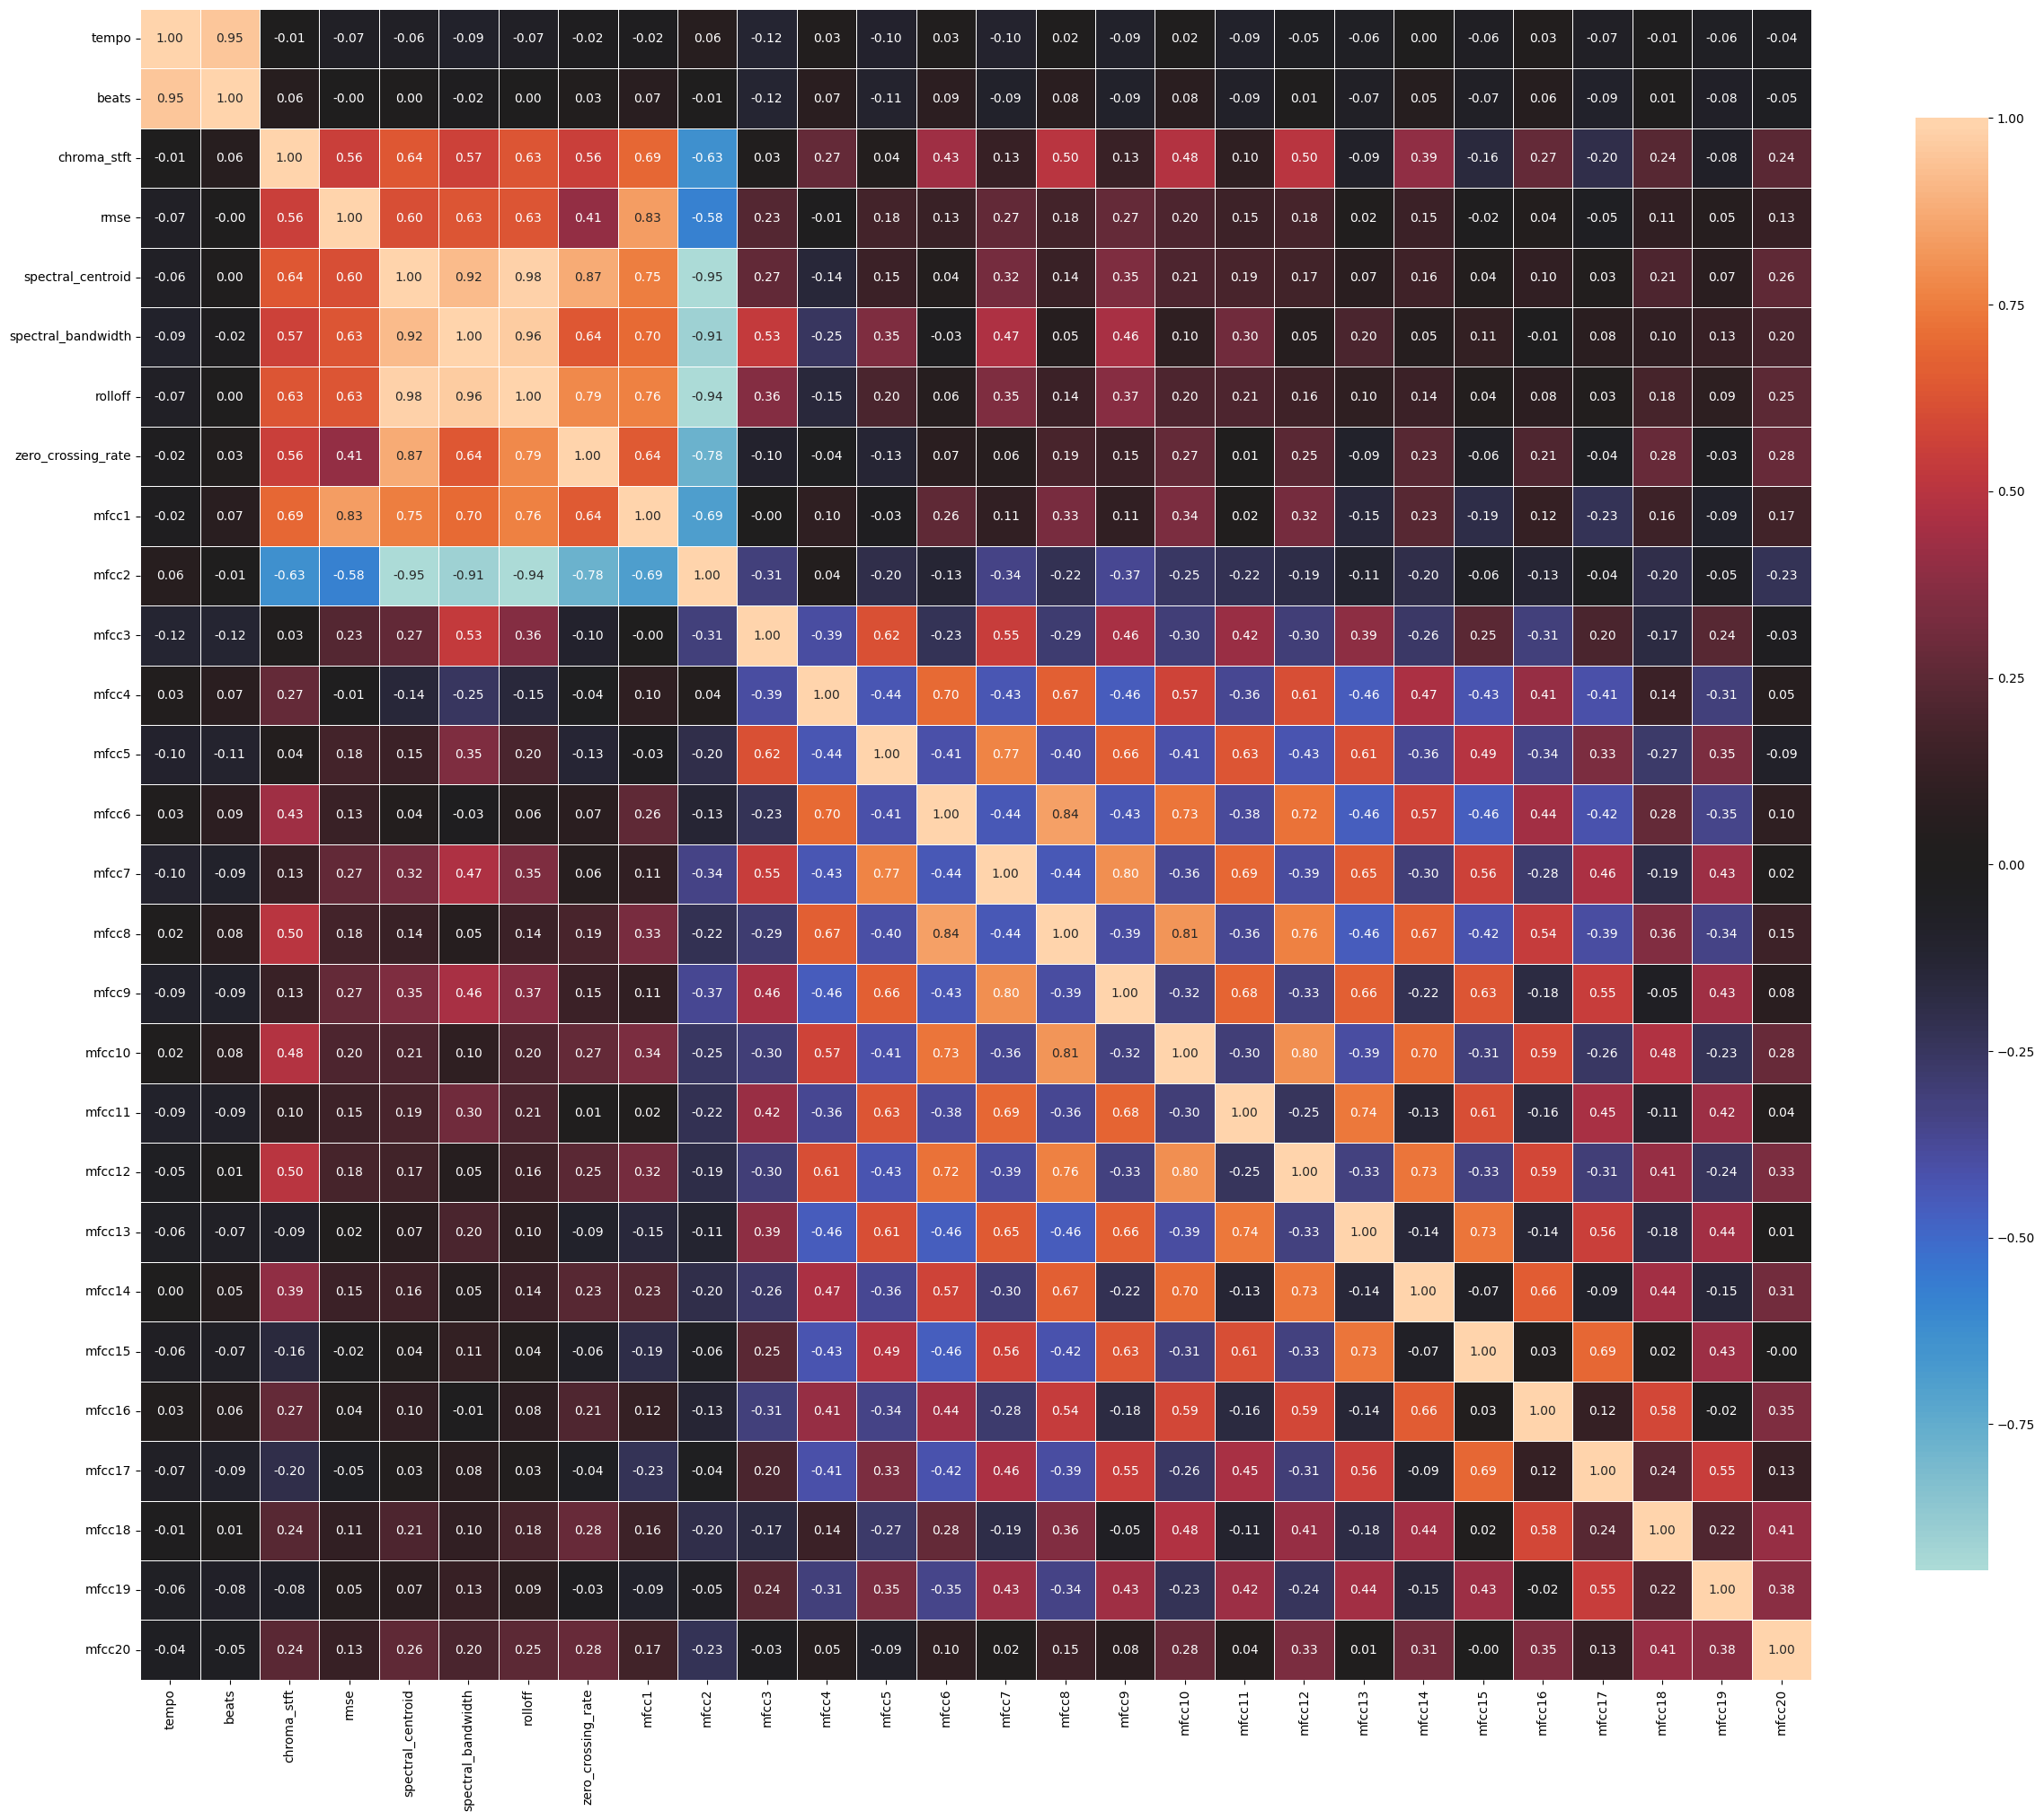

In [ ]:
correlations = df.corr()

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [ ]:
#Data preparation
df = df.drop('filename', axis=1)

In [ ]:
X=df.drop(['label'],axis=1)
y=df['label']

In [ ]:
#Label encoding
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV


X=df.drop(['label'],axis=1)

df['label']=df['label'].astype(str)
y = df['label']
label_encoder = LabelEncoder().fit(y)
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((960, 28), (240, 28))

In [ ]:
from sklearn.metrics import accuracy_score
models=[LogisticRegression,DecisionTreeClassifier,SVC,RandomForestClassifier]
d={}
for i in models:
  model=i()
  model.fit(X_train,y_train)
  y_preds=model.predict(X_test)
  acc=accuracy_score(y_test,y_preds)
  i=str(i).split(".")[-1]
  i=i[:-2]
  d[i]=round(acc,2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
d

{'LogisticRegression': 0.28,
 'DecisionTreeClassifier': 0.35,
 'SVC': 0.22,
 'RandomForestClassifier': 0.43}

In [ ]:
#This can be further improved using XGB Classifier with hyper parameter tuning.

Q-8. Quora question pair similarity, you need to find the Similarity between two
questions by mapping the words in the questions using TF-IDF, and using a supervised
Algorithm you need to find the similarity between the questions.
Dataset This is the Dataset You can use this dataset for this question.

Q-9. A cyber security agent wants to check the Microsoft Malware so need he came
to you as a Machine learning Engineering with Data, You need to find the Malware using a supervised algorithm and you need to find the accuracy of the model.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
#Can you predict if a machine will soon be hit with malware?
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import svm

In [ ]:
# Load train and test files
train_file=pd.read_csv("", sep=",", usecols = selectedFeatures+['HasDetections'], low_memory=True, nrows = numberOfRows)
test_file=pd.read_csv("", sep=",", usecols = selectedFeatures, low_memory=True, nrows = numberOfRows)

10. An Ad- Agency analyzed a dataset of online ads and used a machine learning
model to predict whether a user would click on an ad or not.
Dataset This is the Dataset You can use this dataset for this question.